<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Proyecto 1

### Procesado del Lenguaje Natural

#### Abril 2021

**Vanessa Gómez Verdejo, Pablo Martínez Olmos, Emilio Parrado Hernández**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

**Autores: Sanchez Texis Nahum, Serrano Diaz Barriga Carlos Heberto, Villa Rodriguez Fernando Arturo**


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

En este proyecto vamos a utilizar las técnicas y métodos de procesamiento de cadenas de texto y corpus de datos que hemos visto en las dos primeras sesiones de curso. Para ello, este proyecto se divide en dos partes.

En la primera parte del proyecto trabajaremos con cadenas de texto en Python, principalmente haremos uso de expresiones regulares, para estructurar un fichero de texto crudo y extraer los campos relevantes para así formar un fichero de datos estructurado con la información relevante para su posterior análisis.

En la seguna parte el proyecto nos centraremos en el preprocesado de textos y para ello resolveremos una tarea de clasificación de tweets. Como particularidad trabajaremos con tweets en dos idiomas diferentes, así que veremos diferentes aproximaciones para hacer frente a este problema. 

In [ ]:
%matplotlib inline  
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'  
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime

# Parte 1: Análisis de ficheros no estructurados 

En esta primera parte de la práctica vamos a utilizar expresiones regulares para extraer y estructurar información de ficheros log de un servidor web. En concreto, vamos a usar una parte del data set de NASA Kennedy Space Center web server en Florida. El dataset completo está disponible en <http://ita.ee.lbl.gov/html/contrib/NASA-HTTP.html>, y contiene todas las peticiones HTTP de dos meses. Aquí vamos a utilizar un subconjunto que sólo contiene algunas de estas solicitudes y se encuentran en el fichero `NASA_access_red.log.zip` que acompaña a este notebook. 

Para analizer este fichero vamos a seguir los siguientes pasos:
1. Generaremos expresiones regulares para extraer los campos relevanes del fichero
2. Usaremos estas expresiones para parsear el fichero de datos y generar una lista de diccionarios con la información relevante almacenada de forma estructurada.
3. Utilizaremos la informacióón estructurada para analizar el contenido del fichero y extraer alguno estadísticos relevantes. 


Para empezar a trabajar vamos a utilizar un pequeño fragmento de este fichero que hemos incluido en la siguiente celda y sobre el que hemos incluido algunos errores de manera intencionada para testear la robustez de los métodos que vamos a diseñar.

In [ ]:
logsHTTP="""199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
unicomp6.unicomp.net - - [01/Jul/95:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
 burger.letters.com - - [01/Jul/1995-00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 -
burger.letters.com - - [01/July/1995:00:00:12 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 304 0
burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/video/livevideo.gif HTTP/1.0" 200 -
205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/countdown.html HTTP/1.0" 200 3985
 - - [01/Jul/1995:00:00:13 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
129.94.144.152 - - [01/Jul/1995:00:00:13 -0400] "GET / HTTP/1.0" 200 -
unicomp6.unicomp.net - - [01/Jul/1995:00:00:14] "GET /shuttle/countdown/count.gif HTTP/1.0" 200 40310
unicomp6.unicomp.net - - [01/Jul/1995:00:00:14 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 200 786
pipe6.nyc.pipeline.com - - [01/Jul/1995:00:22:43 -0400] "GET /shuttle/missions/sts-71/movies/sts-71-mir-dock.mpg" 200 946425
columbia.acc.brad.ac.uk - - [01/Jul/1995:00:51:31 -0400] "GET /ksc.html" 200 7074"""

print(logsHTTP)


199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
unicomp6.unicomp.net - - [01/Jul/95:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
 burger.letters.com - - [01/Jul/1995-00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 -
burger.letters.com - - [01/July/1995:00:00:12 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 304 0
burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/video/livevideo.gif HTTP/1.0" 200 -
205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/countdown.html HTTP/1.0" 200 3985
 - - [01/Jul/1995:00:00:13 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
129.94.144.152 - - [01/Jul/1995:00:00:13 -0400] "GET / HTTP/1.0" 200 -
unicomp6

A partir de la información de `logsHTTP` genere una lista (llamada `registros`) de strings donde cada elemento de la lista se corresponda con una línea del fichero (un registro). Tenga en cuenta que las líneas del fichero acaban con retorno de carro `'\n'`. Además guarde el primer elemento de la lista en la variable `myregistro`.

In [ ]:
registros=logsHTTP.split('\n')
myregistro=registros[0]

## 1.1 Estructurando la información de cada entrada (3 puntos)

El contenido de cada registro del log de un servidor web tiene una estructura concreta ([Formato web server log](https://www.w3.org/Daemon/User/Config/Logging.html#common-logfile-format)). Los campos son:

`remotehost rfc931 authuser [date] "request" status bytes`

| campo         | significado                                                                |
| ------------- | ---------------------------------------------------------------------- |
| _remotehost_  | Remote hostname (or IP number if DNS hostname is not available).       |
| _rfc931_      | The remote logname of the user .|
| _authuser_    | The username of the remote user, as authenticated by the HTTP server.  |
| _[date]_      | The date and time of the request.                                      |
| _"request"_   | The request, exactly as it came from the browser or .            |
| _status_      | The HTTP status code the server sent back to the .               |
| _bytes_       | The number of bytes (`Content-Length`) transferred to the .      |


Nuestro objetivo va a ser extraer estos campos de cada registro del fichero y almacenarlos en un diccionario donde las claves serán los nombres de los campos y los valores los contenidos que vamos a extraer de cada registro. De este modo, por cada registro generaremos un diccionario que iremos guardando en una lista; así, tras parsear todo el fichero, acabaremos generando una lista de diccionarios. Los campos `rfc931` y `authuser` no se incluyen en el fichero con el que vamos a trabajar, así que los ignoraremos y nos centraremos en el resto.

Para extraer los campos de cada registro vamos a definir expresiones regulares y para definirlas usaremos nuestro conocimiento sobre la estructura de estos campos de modo que podamos extraer esta información de manera robusta; es decir, si uno de los campos es incorrecto (no sigue esta estructura) la expresión regular no lo extraerá. Si observamos el extracto del fichero log de arriba, hay campos que no están completos o no siguen la estructura correcta, por lo que este fragmento nos servirá de test para asegurarnos que las  expresiones regulares que definimos son robustas.

Como estas expresiones regulares las vamos a usar sobre todos los registros del fichero recomendamos (encarecidamente) que las compile para agilizar el procesado del fichero.

Para facilitar la creación de estas expresiones vamos a ir campo por campo. 

### 1.1.1. Extrayento `remotehost`

Como podemos ver en este campo nos podemos encontrar los nombres de los dominios o sus direcciones IPs. Pero para extraer este campo podemos usar el hecho de que este campo está formado por todos los caracteres (no sabemos cuantos) que están al principio del fichero hasta que encontramos el primer espacio. Además, si este campo está en el fichero, el registro empieza con un caracter que no es un espacio en blanco.

Puede comprobar que la expresión regular funciona correctamente sobre la variable `myregistro` y luego analizar si es robusta a errores en el fichero aplicandola sobre todos los registros de `registros`. Para este procesado use una lista comprimida (*list comprenhension*).
Para los registros incorrectos almacenaremos un valor de `None`.

In [ ]:
# host_patt = re.compile(r"^([^\s]+)\s")
host_patt = re.compile(r"^(\S+)\s")
host=re.match(host_patt,myregistro).group(1)
print(host)

199.72.81.55


In [ ]:
[re.match(host_patt,a).group(1) if re.match(host_patt,a) is not None else None for a in registros]

['199.72.81.55',
 'unicomp6.unicomp.net',
 '199.120.110.21',
 None,
 '199.120.110.21',
 'burger.letters.com',
 'burger.letters.com',
 '205.212.115.106',
 None,
 '129.94.144.152',
 'unicomp6.unicomp.net',
 'unicomp6.unicomp.net',
 'pipe6.nyc.pipeline.com',
 'columbia.acc.brad.ac.uk']

### 1.1.2 Extrayendo `[date]`

El campo de la fecha tiene la siguiente estructura:

`[dd/MMM/yyyy:hh:mm:ss -zzzz]`

donde:
* `dd`: dos dígitos indicando el día
* `MMM`: 3 caracteres indicando el mes
* `yyyy`: 4 dígitos indicando el año
* `hh`: dos dígitos indicando la hora
* `mm`: dos dígitos indicando el minuto
* `ss`: dos dígitos indicando el segundo
* `-zzzz`: zona horaria

Diseñe la expresión regular que le permita extraer de los registros el contenido de `dd/MMM/yyyy:hh:mm:ss`. Al igual que antes, pruebe la expresión regular sobre `myregistro` y luego analice si es robusta a errores ejecutándola sobre `registros`.



In [ ]:
myregistro

'199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245'

In [ ]:
date_patt = re.compile(r"^.*[\[](?P<date>\d{2}\/[a-zA-Z]{3}\/\d{4}:\d{2}:\d{2}:\d{2})")
# date_patt = re.compile(r"(?P<date>\d{2}\/[a-zA-Z]{3}\/\d{4}:\d{2}:\d{2}:\d{2})")
date = date_patt.match(myregistro).group(1)
# date=re.search(date_patt,myregistro).group('date')
print(date)

01/Jul/1995:00:00:01


In [ ]:
[re.match(date_patt,a).group('date') if re.match(date_patt,a) is not None else None for a in registros]

['01/Jul/1995:00:00:01',
 None,
 '01/Jul/1995:00:00:09',
 None,
 '01/Jul/1995:00:00:11',
 None,
 '01/Jul/1995:00:00:12',
 '01/Jul/1995:00:00:12',
 '01/Jul/1995:00:00:13',
 '01/Jul/1995:00:00:13',
 '01/Jul/1995:00:00:14',
 '01/Jul/1995:00:00:14',
 '01/Jul/1995:00:22:43',
 '01/Jul/1995:00:51:31']

### 1.1.3. Extrayendo `request`

El campo del `request` tiene un formato de este tipo:

`"GET /apache_pb.gif HTTP/1.0"`

En nuestros registros nos vamos a encontrar este campo entre comillas. Su contenido empieza con la palabra clave `GET` seguido del nombre del recurso solicitado (en el ejemplo `/apache_pb.gif`); entre la palabra clave `GET` y el recurso puede haber uno o varios espacios en blanco. A continuación indica el plotocolo HTTP usado, para ello incluye la palabra clave `HTTP` seguida de una serie de caracteres (sin formato predefinido). Entre el recurso y el protocolo puede haber uno o varios espacios en blanco. 

Diseñe la expresión regular que le permita extraer el nombre del recurso solicitado (en el ejemplo sería `/apache_pb.gif`). Al igual que antes, pruebe la expresión regular sobre `myregistro` y luego analice si es robusta a errores ejecutándola sobre `registros`.



In [ ]:
myregistro

'199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245'

In [ ]:
# request_patt = re.compile(r"""^.*"\w+\s+(\S+)\s+HTTP""")
request_patt = re.compile(r"^.*GET\s*(\S+)\s*HTTP.+")
request=re.match(request_patt,myregistro).group(1)
print(request)

/history/apollo/


In [ ]:
[re.match(request_patt,a).group(1) if re.match(request_patt,a) is not None else None for a in registros]

['/history/apollo/',
 '/shuttle/countdown/',
 '/shuttle/missions/sts-73/mission-sts-73.html',
 '/shuttle/countdown/liftoff.html',
 '/shuttle/missions/sts-73/sts-73-patch-small.gif',
 '/images/NASA-logosmall.gif',
 '/shuttle/countdown/video/livevideo.gif',
 '/shuttle/countdown/countdown.html',
 '/shuttle/countdown/',
 '/',
 '/shuttle/countdown/count.gif',
 '/images/NASA-logosmall.gif',
 None,
 None]

### 1.1.4 Extrayendo `status`

El campo del `status` es simplemente un  código de 3 dígitos que se encuentra después de la petición realizada (cuando acaban las comillas) y separado de la petición por uno o varios espacios en blanco.

Diseñe la expresión regular que le permita extraer el código asociado al estado de la petición. Al igual que antes, pruebe la expresión regular sobre `myregistro` y luego analice si es robusta a errores ejecutándola sobre `registros`.



In [ ]:
# status_patt = re.compile(r"""^.*".*"\s+(\d+)""")
status_patt = re.compile(r"""^.*"\s+(\d{3})""")
status=re.match(status_patt,myregistro).group(1)
print(status)

200


In [ ]:
[re.match(status_patt,a).group(1) if re.match(status_patt,a) is not None else None for a in registros]

['200',
 '200',
 '200',
 '304',
 '200',
 '304',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200']

### 1.1.5 Extrayendo `bytes`

El campo del `bytes` es simplemente un conjunto dígitos que se encuentran al final del registro y se encuentra separado del estado por uno o varios espacios en blanco.

Diseñe la expresión regular que le permita extraer el número de bytes intercambiados en la petición. Al igual que antes, pruebe la expresión regular sobre `myregistro` y luego analice si es robusta a errores ejecutándola sobre `registros`.

En este caso, hay muchos registros que en vez de contener el número de bytes intercambiados incluyen el carácter `'-'`; en este caso, procesaremos estas cadenas e incluiremos valores a `'0'`. Además, aproveche la extracción de datos para convertir esta cadena de texto a entero (`int`) para facilitar posteriores análisis sobre los datos.


In [ ]:
# bytes_patt = re.compile(r"""^.*"\s+\d+\s(\d+)$""")
bytes_patt = re.compile(r"""^.*\s(\d+)$""")
byte=re.match(bytes_patt,myregistro).group(1)
print(byte)

6245


In [ ]:
[int(re.match(bytes_patt,a).group(1)) if re.match(bytes_patt,a) is not None else 0 for a in registros]

[6245, 3985, 4085, 0, 0, 0, 0, 3985, 3985, 0, 40310, 786, 946425, 7074]

## 1.2 Parseado de todo el fichero de datos (1 punto)

Con las expresiones regulares diseñadas anteriormente diseñe una función que por cada registro genere un diciconario con todos los campos de interés. A continuación, cargue el fichero de datos que le damos y  procéselo para extraer una lista de diccionarios con todo el contenido del fichero estructurado. 

In [ ]:
import zipfile
from urllib.request import urlopen
from io import BytesIO # For Pyhton 3

myfile = BytesIO(urlopen("http://www.tsc.uc3m.es/~vanessa/data_notebooks/logs/NASA_access_red.log.zip").read())
# In case you have problems to access to the url, upload the fila to colab and use the following line
# myfile = NASA_access_red.log.zip

with zipfile.ZipFile(myfile) as myzip:
    with myzip.open('NASA_access_red.log') as myfile:
       logsHTTP = myfile.read().decode('UTF-8')

In [ ]:
lst_logsHTTP=logsHTTP.split('\n')

In [ ]:
def parseado(reg):
  host_patt = re.compile(r"^(\S+)\s")
  date_patt = re.compile(r"^.*[\[](.*)[\]]")
  request_patt = re.compile(r"^.*GET\s*(\S+)\s*HTTP")
  status_patt = re.compile(r"""^.*".*"\s+(\d+)""")
  bytes_patt = re.compile(r"""^.*\s(\d+)$""")

  d={}
  d['host']=re.match(host_patt,reg).group(1) if re.match(host_patt,reg) is not None else None
  d['date']=re.match(date_patt,reg).group(1) if re.match(date_patt,reg) is not None else None
  d['request']=re.match(request_patt,reg).group(1) if re.match(request_patt,reg) is not None else None
  d['status']=re.match(status_patt,reg).group(1) if re.match(status_patt,reg) is not None else None
  d['bytes']=int(re.match(bytes_patt,reg).group(1)) if re.match(bytes_patt,reg) is not None else 0
  return d

In [ ]:
%%time
lst_parseado=[parseado(a) for a in lst_logsHTTP]

CPU times: user 11.1 s, sys: 372 ms, total: 11.4 s
Wall time: 11.6 s


In [ ]:
len(lst_parseado)

302287

Compruebe ahora las entradas que ha parseado correctamente y elimine de su lista de diccionarios las que eran erróneas (el diccionario debería tener un valor a `None` si no eran correctas). Además, analice los registros que no se han extraido correctamente y compruebe que es por un formato no adecuado  del registro.

In [ ]:
lst_parseado_corr=[b for b in  lst_parseado if  (None in [c for c in b.values() ])==False]

In [ ]:
len(lst_parseado),len(lst_parseado_corr)

(302287, 301433)

## 1.3 OPCIONAL: Parseado eficiente  (0.5 punto extra)

Si queremos hacer un parseado más eficiente, podemos diseñar una única expresión regular que extraiga todos los campos en una única búsqueda sobre cada registro. 
Compare tiempos respecto a la aproximación anterior. 

In [ ]:
def parseado_all(reg):
  all_patt=re.compile(r"""^(\S+)\s*.*\[(\d{2}\/[a-zA-Z]{3}\/\d{4}:\d{2}:\d{2}:\d{2}).*\s+"GET\s*(\S+)\s*HTTP.*"\s+(\d+)\s+(\d+)$""")
  d={}
  find=re.match(all_patt,reg)
  d['host']=find.group(1) if find is not None else None
  d['date']=find.group(2) if find is not None else None
  d['request']=find.group(3) if find is not None else None
  d['status']=find.group(4) if find is not None else None
  d['bytes']=int(find.group(5)) if find is not None else 0
  return d

In [ ]:
%%time
lst_parseado_all=[parseado_all(a) for a in lst_logsHTTP]

CPU times: user 3.84 s, sys: 316 ms, total: 4.16 s
Wall time: 4.25 s


In [ ]:
len(lst_parseado_all)

302287

Podemos observar que al utilizar una única expresión regular donde podamos obtener todos los campos en una única búsqueda resulta más eficiente que hacer una búsqueda por expresión regular, pasando de 11.6 a 4.25 segundos

## 1.4 Análisis del fichero de logs (1 punto)

Una vez que tenemos la información de los ficheros estructurada y hemos eliminado los registros erróneos, podemos analizar dicha información para extraer estadísticos de utilidad sobre el funcionamiento del servidor.
Para realizar este análisis, vamos a trabajar sobre la lista de diccionarios que acabamos de generar para así practicar las operaciones con listas, diccionarios y el uso de listas comprimidas.


#### Ejercicio A

Obtenga el listado único de hosts a los que se ha accedido. ¿Cuántos son? 

In [ ]:
lst_hosts=[a['host'] for a in lst_parseado_corr]
lst_hosts_unicos=set(lst_hosts)
print(f'Se han accedido a {len(lst_hosts_unicos)} hosts únicos')

Se han accedido a 20964 hosts únicos


#### Ejercicio B

Obtenga el número de peticiones correctas (`'status'== '200'`)

In [ ]:
lst_peticiones=[a['status'] for a in lst_parseado_corr if a['status']=='200']
print(f'Se han obtenido {len(lst_peticiones)} peticiones correctas')

Se han obtenido 271642 peticiones correctas


#### Ejercicio C

Calcule la cantida total de información descargada. Teniendo en cuenta que la infromacióón contenida en el fichero está en bytes, exprese en resultado en MB.

In [ ]:
lst_bytes=[a['bytes'] for a in lst_parseado_corr]
print(f'Se han descargado {np.round(np.sum(lst_bytes)/1000000,2)} MB de información')

Se han descargado 7347.82 MB de información


# Parte 2: Clasificación de tweets

En esta segunda parte del proyecto vamos a trabajar con un problema de clasificación de textos. En concreto, vamos a clasificar tweets en cuatro categorías en función de lo que han gustado.

Para empezar a trabajar con esta base de datos, ejecute la siguiente celda para cargar el fichero de datos en un dataframe.

In [ ]:
import pandas as pd

tweets_df  = pd.read_csv('http://www.tsc.uc3m.es/~vanessa/data_notebooks/tweets/tweets.csv')    

# Si tiene problemas para cargar el fichero desde una url externa, suba el fichero a Google colab y cargelo como:
# tweets_df  = pd.read_csv('tweets.csv') 

tweets_df

,company,date,tweet,n_replies,n_retweets,n_likes
0,0100 Meliá Hotels International,24/12/2019,#BRAVOSBookSelection by @GranMeliaHotels brin...,0.0,0.0,2.0
1,0100 Meliá Hotels International,13/12/2019,As a result of our partnership with @audispai...,1.0,90.0,1449.0
2,0100 Meliá Hotels International,12/12/2019,"Gracias a nuestra fortaleza digital, hemos al...",0.0,65.0,258.0
3,0100 Meliá Hotels International,09/12/2019,Es #TiempoDeActuar y estamos orgullosos de an...,2.0,97.0,276.0
4,0100 Meliá Hotels International,28/11/2019,.@InnsidebyMelia recibe el reconocimiento de ...,0.0,43.0,169.0
...,...,...,...,...,...,...
869,2500 Blue Sea Hotels,07/11/2019,¡La familia crece??! En #BLUESEAHotels estamo...,0.0,1.0,2.0
870,2500 Blue Sea Hotels,06/11/2019,La costa de #Cofete es ideal para contemplar ...,0.0,0.0,1.0
871,2901 Ona Hotels,24/01/2019,Vía @preferente ?? https://goo.gl/7CKnPL ...,0.0,1.0,1.0
872,3000 Med Playa Hotels,21/10/2019,Discover the magic of holidays spent together...,0.0,1.0,2.0


## 2.1 Definir las categorías del problema  (0.5 punto)

Como puede ver en el dataframe que acabamos de generar, hay un campo llamado `n_likes` que nos indica si el tweet en cuestión ha gustado o no. A partir del valor de este campo vamos a definir 4 categorías:
* No ha gustado (`label=0`) si `n_likes==0`
* Apenas ha gustado (`label=1`) si `0<n_likes<5`.
* Ha gustado (`label=2`) si `5<=n_likes<10`.
* Ha gustado mucho (`label=3`) si `n_likes>=10`.

Defina una nueva columna, llamada `labels` con el valor de estas categorías.

Una vez creada esta columna, si lo desea, puede crear un nuevo dataframe  quedándose con las columnas `tweet` y `label` y eliminando el resto.


In [ ]:
def label(df):
    
    if ((df['n_likes'] == 0)):
        return 0
    elif ((df['n_likes'] > 0) & (df['n_likes'] < 5)):
        return 1
    elif ((df['n_likes'] >= 5) & (df['n_likes'] < 10)):
        return 2
    elif (df['n_likes'] >= 10):
        return 3
    
tweets_df['label'] = tweets_df.apply(label, axis = 1)

In [ ]:
df=tweets_df[['tweet','label']]

In [ ]:
df.label.value_counts(True)

1    0.453089
3    0.305492
2    0.157895
0    0.083524
Name: label, dtype: float64

## 2.2 Detectar idioma y dividir el corpus datos por idioma (1 punto)

Si leemos algunos de los tweets que componen nuestro dataset, nos podemos dar cuenta que tenemos tweets en dos idiomas diferentes:  castellano (`es`) e inglés (`en`). 

Procesar directamente el corpus completo nos llevaría a un vocabulario con términos en ambos idiomas que no seríamos capaces de relacionar. Por ello vamos a dividir nuestro dataframe en dos, uno con los tweets en castellano y otro con los tweets en inglés.

Para dividir el corpus, siga los siguientes pasos:


1. Cree una función, `detect_lang`, para detectar automáticamente el idioma del tweet a partir de las *stopwords* del texto. 

Para ello, use la lista de *stopwords* de castellano y de inglés y cuente cuántas *stopwords* hay de cada idioma, a partir de ello, asigne al tweet al idioma (`en` o `es`) del que tiene más *stopwords*. 

Una vez definida esta función, compruebe su funcionamiento tomando como ejemplo alguno de los tweets del dataframe.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
stopwords_es = stopwords.words('spanish')
def detect_lang(text,stopwords_en,stopwords_es):
  txt = nltk.word_tokenize(text)
  txt=[a.lower() for a in txt]
  len_en=len([a for a in txt if a in stopwords_en])
  len_es=len([a for a in txt if a in stopwords_es])
  if len_en>=len_es:
    return "en"
  else:
    return "es"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
txt_samp=df.tweet[20]
print(txt_samp)
print(f"El idioma del tweet es: {detect_lang(txt_samp,stopwords_en,stopwords_es)}")

 Our management system, based on recipes and cost breakdowns, adapts our offer depending on the number of diners and services requested. We produce only what is needed and almost right away, while also ensuring both the quantity and quality of what we serve. #GastrobyMelia pic.twitter.com/Cbu1hMjMWj 
El idioma del tweet es: en


2. Use la función `detect_lang` para generar en `tweets_df` una nueva columna (`lang`) con el idioma detectado (`en` o `es`)

In [ ]:
%%time
df['lang']=df['tweet'].apply(lambda x: detect_lang(x,stopwords_en,stopwords_es))

CPU times: user 808 ms, sys: 4.08 ms, total: 813 ms
Wall time: 818 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3. Genere dos nuevos dataframes, `tweets_df_es` y `tweets_df_en`, con los tweets en castellano y en inglés, respectivamente. 

¿Cuántos tweets hay de cada idioma?

In [ ]:
tweets_df_es =df[df['lang']=='es']
tweets_df_en =df[df['lang']=='en']

In [ ]:
print(f"Existen {len(tweets_df_es)} tweets en español y {len(tweets_df_en)} en inglés")

Existen 541 tweets en español y 333 en inglés


## 2.3 Preprocesamiento de tweets  (1 punto)

A continuación, vamos a aplicar el preprocesamiento estándar visto en clase para la tokenización, limpieza y homogeneización de textos. Para ello, defina una función que implemente este proceso y apliquésela a cada corpus de datos (al de tweets en castellano y al de tweets en inglés).

**OPCIONAL (0.5 punto extra)**: Si lo considera oportuno, puede realizar funciones diferentes, con consideraciones diferentes, para cada idioma. Además, si desea incluir pasos adicionales al preprocesado estándar que considere que pueden ser de utilidad para corpus, serán valoradas positivamente hasta medio punto adicional. No obstante, en caso de incluirlas, justifique su necesidad y la mejora aportada.

In [ ]:
! pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 11.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=6e71cb9218d211af86dff2b2584c7f015134590ce56b9709d1bd4126ab435df8
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
## Load Modules
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string 
import contractions
import emoji
import re
import nltk
nltk.download('omw-1.4')

lemmatizer  = WordNetLemmatizer()
stopwords_en   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation 

def normalize(text, lang = 'es'):
  if lang == 'es':
    text2 = text.lower().translate(str.maketrans('áéíóú#@','aeiou  ', string.punctuation+'¿¡')) # Quitamos acentos del español, menciones y hashtags
    text_tokens = nltk.word_tokenize(text2)
    normalized_text = [lemmatizer.lemmatize(t) for t in text_tokens if (t not in stopwords_es)] # Lematize


  else:
    text2 = contractions.fix(text).lower().translate(str.maketrans('#@','  ', string.punctuation)) # Arreglamos las contracciones 
    text_tokens = nltk.word_tokenize(text2) # Tokenizamos por regex para conservar los emoticonos
    normalized_text = [lemmatizer.lemmatize(t) for t in text_tokens if (t not in stopwords_en)]
  return normalized_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
tweets_df_es['tweet_clean'] = tweets_df_es.tweet.apply(normalize)
tweets_df_en['tweet_clean'] = tweets_df_en.tweet.apply(lambda x: normalize(x, 'en'))

<ipython-input-52-5abf963a7f68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_es['tweet_clean'] = tweets_df_es.tweet.apply(normalize)
<ipython-input-52-5abf963a7f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_en['tweet_clean'] = tweets_df_en.tweet.apply(lambda x: normalize(x, 'en'))


In [ ]:
tweets_df_es.head()

,tweet,label,lang,tweet_clean
2,"Gracias a nuestra fortaleza digital, hemos al...",3,es,"[gracias, fortaleza, digital, alcanzado, nuevo..."
3,Es #TiempoDeActuar y estamos orgullosos de an...,3,es,"[tiempodeactuar, orgullosos, anunciar, primera..."
4,.@InnsidebyMelia recibe el reconocimiento de ...,3,es,"[innsidebymelia, recibe, reconocimiento, premi..."
6,"¿Sabías que cada año, 7,7 millones de tonelad...",3,es,"[sabias, cada, año, 77, millones, toneladas, a..."
8,Mañana el campo de Sol Marbella Estepona Atal...,3,es,"[mañana, campo, sol, marbella, estepona, atala..."


In [ ]:
tweets_df_en.head()

,tweet,label,lang,tweet_clean
0,#BRAVOSBookSelection by @GranMeliaHotels brin...,1,en,"[bravosbookselection, granmeliahotels, brings,..."
1,As a result of our partnership with @audispai...,3,en,"[result, partnership, audispain, several, hote..."
5,3 of our properties in the #DominicanRepublic...,3,en,"[3, property, dominicanrepublic, among, top, 5..."
7,Driven by our commitment to sustainability an...,3,en,"[driven, commitment, sustainability, excellenc..."
9,We collaborate with @audispain to promote the...,3,en,"[collaborate, audispain, promote, benefit, sus..."


## 2.4 Vectorización de documentos (1 punto)

El siguiente paso de nuestro pipeline es la vectorización de los tweets que acabamos de procesar para obtener su representación BoW y TF-IDF. Para ello, empiece generando un diccionario para, a continuación, obtener la representación BoW y, después, la representación TF-IDF. 

Para la creación del diccionario se recomienda eliminar los terminos que considere no relevantes y, además, limitar su tamaño. Justifique cómo realiza este proceso.

In [ ]:
tokens_corpus = [token for doc in tweets_df_es.tweet_clean for token in doc]
counts  = nltk.FreqDist(tokens_corpus)
vocab   = len(counts.keys()) 
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))
## 1.9% para tweets en español

El corpus tiene 5982 palabras únicas y un total de 13625 palabras con una diversidad léxica de 2.278


In [ ]:
counts.most_common(20)

[('hotel', 211),
 ('ma', 106),
 ('globales', 76),
 ('estancia', 71),
 ('riu', 65),
 ('hoteles', 64),
 ('parador', 61),
 ('gracias', 60),
 ('gratis', 57),
 ('nuevo', 53),
 ('habitacionconvistas', 53),
 ('wifi', 52),
 ('hoy', 50),
 ('dia', 50),
 ('mallorca', 48),
 ('2019', 48),
 ('paradores', 47),
 ('eurostars', 40),
 ('10', 39),
 ('gran', 38)]

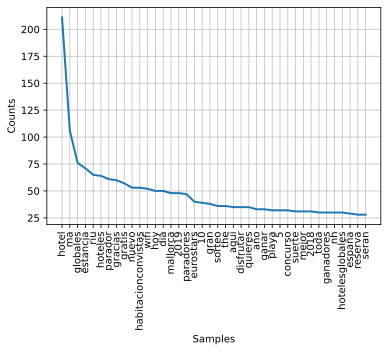

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
counts.plot(40, cumulative=False)

In [ ]:
tokens_corpus = [token for doc in tweets_df_en.tweet_clean for token in doc]
counts  = nltk.FreqDist(tokens_corpus)
vocab   = len(counts.keys()) 
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))
## 1.9% para tweets en español

El corpus tiene 3927 palabras únicas y un total de 8936 palabras con una diversidad léxica de 2.276


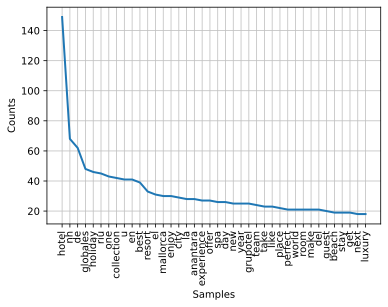

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
counts.plot(40, cumulative=False)

In [ ]:
corpus_es = tweets_df_es.tweet_clean
corpus_en = tweets_df_en.tweet_clean
print(corpus_es)

2      [gracias, fortaleza, digital, alcanzado, nuevo...
3      [tiempodeactuar, orgullosos, anunciar, primera...
4      [innsidebymelia, recibe, reconocimiento, premi...
6      [sabias, cada, año, 77, millones, toneladas, a...
8      [mañana, campo, sol, marbella, estepona, atala...
                             ...                        
860    [2020, iremos, informando, toda, buenas, pract...
861    [pasa, navidadesen, fuerteventura, 42, do, pe...
866    [blackfriday, acerca, bluesea, hotel, preparad...
870    [costa, cofete, ideal, contemplar, mejores, pu...
871    [via, preferente, httpsgoogl7cknpl, ona, hotel...
Name: tweet_clean, Length: 541, dtype: object


In [ ]:
import gensim

# Create dictionary of tokens: the input is the preprocessed corpus 
D_en = gensim.corpora.Dictionary(corpus_en)
n_tokens = len(D_en)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(20):
    print(str(n), ':', D_en[n])

The dictionary contains 3927 terms
First terms in the dictionary:
0 : 6
1 : bite
2 : bravosbookselection
3 : brings
4 : creativity
5 : culture
6 : curator
7 : detail
8 : enrich
9 : experience
10 : expert
11 : gran
12 : granmeliahotels
13 : httpowly6fkp50xdsdi
14 : learn
15 : meliá
16 : pictwittercomatmi3ajigk
17 : selected
18 : selection
19 : spanish


In [ ]:
D_en.filter_tokens(bad_ids=[0,13,16])  # quitamos los números que aparecen al principio

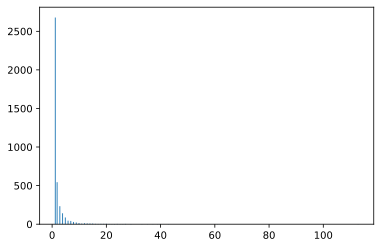

In [ ]:
plt.hist(D_en.dfs.values(),tweets_df_en.shape[0])
plt.show()

In [ ]:
no_below = 5 # Minimum number of documents to keep a term in the dictionary
no_above = .80 # Maximum proportion of documents in which a term can appear to be kept in the dictionary

D_en.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D_en)

print('The dictionary contains', n_tokens, 'terms')

print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D_en[n])

The dictionary contains 327 terms
First terms in the dictionary:
0 : culture
1 : detail
2 : experience
3 : gran
4 : learn
5 : meliá
6 : spanish
7 : together
8 : 100
9 : among


In [ ]:
# Create dictionary of tokens: the input is the preprocessed corpus 
D_es = gensim.corpora.Dictionary(corpus_es)
n_tokens = len(D_es)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(20):
    print(str(n), ':', D_es[n])

The dictionary contains 5982 terms
First terms in the dictionary:
0 : 1065
1 : acertada
2 : agencias
3 : alcanzado
4 : black
5 : campañas
6 : crecimiento
7 : cyber
8 : digital
9 : estrategia
10 : fortaleza
11 : friday
12 : gracias
13 : hito
14 : httpowlyzgkj50xyqb6
15 : logra
16 : meliaprorewards
17 : monday
18 : nuevo
19 : pictwittercomomywklcodg


In [ ]:
D_es.filter_tokens(bad_ids=[0, 14, 19])  # quitamos los números que aparecen al principio

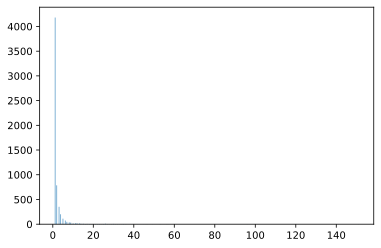

In [ ]:
plt.hist(D_es.dfs.values(),tweets_df_es.shape[0])
plt.show()

In [ ]:
no_below = 5 # Minimum number of documents to keep a term in the dictionary
no_above = .80 # Maximum proportion of documents in which a term can appear to be kept in the dictionary

D_es.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D_es)

print('The dictionary contains', n_tokens, 'terms')

print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D_es[n])

The dictionary contains 461 terms
First terms in the dictionary:
0 : gracias
1 : nuevo
2 : anunciar
3 : mano
4 : mundo
5 : orgullosos
6 : primera
7 : festival
8 : habitacion
9 : marca


Comenzamos con realizar un exploratorio de las palabras más comunes en cada idioma, esto nos permitió eliminar stopwords no identificadas previamente(pictwittercomomywklcodg,httpowlyzgkj50xyqb6,6), después de esto optamos por hipermarametrizar el filtrado extremo (mantener keywords y eliminar rarewords).

## 2.5 Clasificación  (0.5 puntos)

Por último, utilice un clasificador Naive Bayes (puede usar su versión estándar o complementaria) para resolver el problema de clasificación de tweets. Compare las prestaciones, en terminos de tasa de acierto, cuando se usa la representación BoW y cuando se utiliza la TF-IDF.

Para analizar las prestaciones del modelo, divida cada corpus de datos en una partición 60%/40% (entrenamiento/test).

A partir de la tasa de acierto en cada corpus, obtenga la tasa de acierto en el corpus de datos total. Para calcular esta tasa de acierto, tenga en cuenta que cada corpus tiene número diferentes de elementos.

BOW

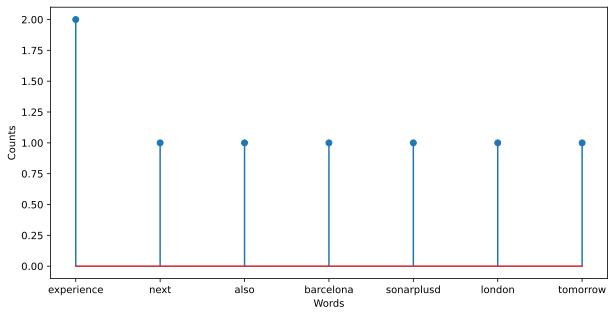

In [ ]:

corpus_bow_en = [D_en.doc2bow(doc) for doc in corpus_en]
n_doc=25#Tweet
list_word_counts = [(D_en[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow_en[n_doc][:10]]
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [ ]:
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model_en = TfidfModel(corpus_bow_en)  

# apply model to the first corpus document
vector = model_en[corpus_bow_en[0]]  # apply model to the first corpus document
print(vector)

[(0, 0.3885649947114869), (1, 0.4224162292573524), (2, 0.2604965986574942), (3, 0.33433853861834056), (4, 0.3632811741445192), (5, 0.37513089228342406), (6, 0.32628573610972433), (7, 0.33433853861834056)]


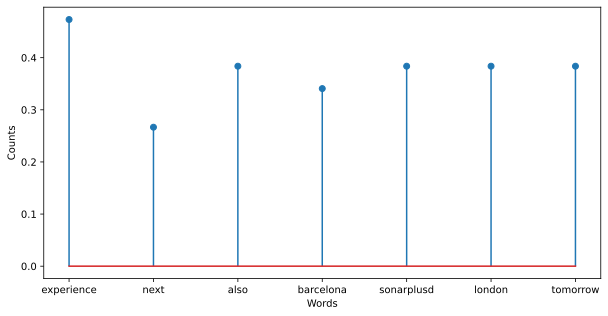

In [ ]:
corpus_tfidf_en = [model_en[doc] for doc in corpus_bow_en]
n_doc=25#Tweet
list_word_counts = [(D_en[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_tfidf_en[n_doc][:10]]
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D_en)
num_docs = len(corpus_bow_en)
# Convert BoW representacion
corpus_bow_sparse = corpus2csc(corpus_bow_en, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_sparse = corpus2csc(corpus_tfidf_en, num_terms=n_tokens, num_docs=num_docs).T

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
# Code for BoW representation
Y = tweets_df_en.label
# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_sparse, Y, test_size=0.4, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
# print(accuracy_score(y_test, y_pred, normalize=True))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.96      0.84      0.89       116
           2       0.80      0.92      0.86        26
           3       0.77      0.92      0.84        39

    accuracy                           0.87       199
   macro avg       0.82      0.89      0.85       199
weighted avg       0.88      0.87      0.87       199

              precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.67      0.63      0.65        78
           2       0.18      0.21      0.20        19
           3       0.42      0.54      0.47        24

    accuracy                           0.51       134
   macro avg       0.41      0.40      0.40       134
weighted avg       0.53      0.51      0.52       134



In [ ]:
print("Distribución real de target")
Y.value_counts(True)

Distribución real de target


1    0.582583
3    0.189189
2    0.135135
0    0.093093
Name: label, dtype: float64

In [ ]:
print("Distribución predicha train")
pd.Series(y_train_pred).value_counts(True)

Distribución predicha train


1    0.507538
3    0.236181
2    0.150754
0    0.105528
dtype: float64

In [ ]:
print("Distribución predicha test")
pd.Series(y_test_pred).value_counts(True)

Distribución predicha test


1    0.544776
3    0.231343
2    0.164179
0    0.059701
dtype: float64

In [ ]:
# Code for TFIDF representation
Y = tweets_df_en.label
# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf_sparse, Y, test_size=0.4, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
# print(accuracy_score(y_test, y_pred, normalize=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.64      0.98      0.78       116
           2       1.00      0.04      0.07        26
           3       0.90      0.49      0.63        39

    accuracy                           0.67       199
   macro avg       0.64      0.38      0.37       199
weighted avg       0.68      0.67      0.59       199

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.60      1.00      0.75        78
           2       0.00      0.00      0.00        19
           3       0.67      0.08      0.15        24

    accuracy                           0.60       134
   macro avg       0.32      0.27      0.22       134
weighted avg       0.47      0.60      0.46       134



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

In [ ]:
print("Distribución predicha train")
pd.Series(y_train_pred).value_counts(True)

Distribución predicha train


1    0.889447
3    0.105528
2    0.005025
dtype: float64

In [ ]:
print("Distribución predicha test")
pd.Series(y_test_pred).value_counts(True)

Distribución predicha test


1    0.977612
3    0.022388
dtype: float64

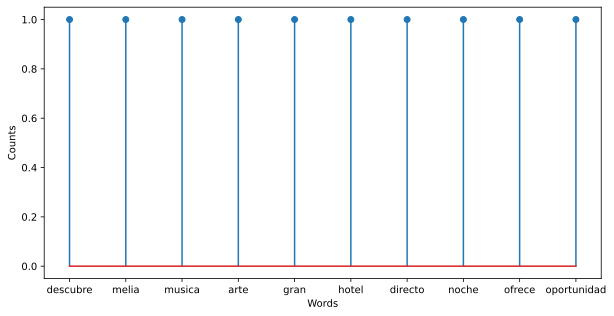

In [ ]:
corpus_bow_es = [D_es.doc2bow(doc) for doc in corpus_es]
n_doc=25#Tweet
list_word_counts = [(D_es[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow_es[n_doc][:10]]
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [ ]:
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model_es = TfidfModel(corpus_bow_es)  

# apply model to the first corpus document
vector = model_es[corpus_bow_es[0]]  # apply model to the first corpus document
print(vector)

[(0, 0.8886072317497478), (1, 0.4586689303648657)]


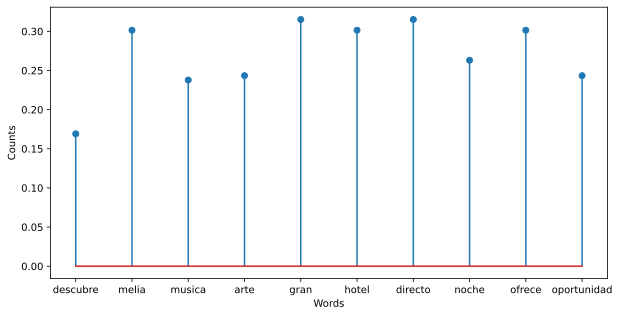

In [ ]:
corpus_tfidf_es = [model_en[doc] for doc in corpus_bow_es]
n_doc=25#Tweet
list_word_counts = [(D_es[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_tfidf_es[n_doc][:10]]
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D_es)
num_docs = len(corpus_bow_es)
# Convert BoW representacion
corpus_bow_sparse = corpus2csc(corpus_bow_es, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_sparse = corpus2csc(corpus_tfidf_es, num_terms=n_tokens, num_docs=num_docs).T

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Code for BoW representation
Y = tweets_df_es.label
# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_sparse, Y, test_size=0.4, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.84      0.89      0.87       119
           2       0.84      0.84      0.84        55
           3       0.92      0.89      0.90       123

    accuracy                           0.87       324
   macro avg       0.87      0.86      0.86       324
weighted avg       0.87      0.87      0.87       324

              precision    recall  f1-score   support

           0       0.11      0.20      0.14        15
           1       0.57      0.55      0.56        83
           2       0.17      0.21      0.19        38
           3       0.70      0.56      0.62        81

    accuracy                           0.47       217
   macro avg       0.39      0.38      0.38       217
weighted avg       0.52      0.47      0.49       217



In [ ]:
print("Distribución real de target")
Y.value_counts(True)

Distribución real de target


3    0.377079
1    0.373383
2    0.171904
0    0.077634
Name: label, dtype: float64

In [ ]:
print("Distribución predicha train")
pd.Series(y_train_pred).value_counts(True)

Distribución predicha train


1    0.388889
3    0.364198
2    0.169753
0    0.077160
dtype: float64

In [ ]:
print("Distribución predicha test")
pd.Series(y_test_pred).value_counts(True)

Distribución predicha test


1    0.368664
3    0.294931
2    0.211982
0    0.124424
dtype: float64

In [ ]:
# Code for BoW representation
Y = tweets_df_es.label
# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf_sparse, Y, test_size=0.4, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

print(accuracy_score(y_test, y_test_pred, normalize=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.60      0.89      0.72       119
           2       1.00      0.05      0.10        55
           3       0.76      0.89      0.82       123

    accuracy                           0.67       324
   macro avg       0.59      0.46      0.41       324
weighted avg       0.68      0.67      0.59       324

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.46      0.65      0.54        83
           2       0.00      0.00      0.00        38
           3       0.46      0.57      0.51        81

    accuracy                           0.46       217
   macro avg       0.23      0.30      0.26       217
weighted avg       0.35      0.46      0.40       217

0.4608294930875576


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

In [ ]:
print("Distribución predicha train")
pd.Series(y_train_pred).value_counts(True)

Distribución predicha train


1    0.546296
3    0.444444
2    0.009259
dtype: float64

In [ ]:
print("Distribución predicha test")
pd.Series(y_test_pred).value_counts(True)

Distribución predicha test


1    0.543779
3    0.456221
dtype: float64

# Conclusiones Clasificación  
Al observar las métricas de los modelos dada una transformación BOW y TF-IDF nos damos cuenta que las métricas a nivel general (accuracy) resultan mejores para la transformación TF-IDF, sin embargo al revisar el detalle de cada una de las clases mediante otras métricas (precisión, recall, f1-score) nos damos cuenta que la transformación BOW resulta ser un modelo más confiable, al manter la distribución de las etiquetas origianales.
Cabe destacar que para ambas transformaciones- sin importar el idioma se sufre de overfitting. Se propone que para solucionar este tema se realice una limpieza de datos a mayor detalle.

## 2.5 Tradución de textos (1 punto)

Otra opción para trabajar con textos en diferentes idiomas consiste en traducir los textos de un idioma al otro.

Para explorar esta opción vamos a usar la librería `deep_translator` y dentro de ella el traductor de Google. En este [link](https://pypi.org/project/deep-translator/) puede ver las diferentes funcionalidades de esta librería y puede ver que incluye otros traductores automáticos; la mayoría de estos traductores requieren generar claves específicas para su uso, mientras que el de Google se puede usar directamente, por este motivo, nos vamos a decantar por este último.

Las siguientes celdas de código importan esta librería y muestran con un ejemplo como usar el traductor de Google.

In [ ]:
!pip install -U deep_translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='es', target='en')
translator.translate('Esto es un texto en castellano que vamos a traducir al inglés')

'This is a text in Spanish that we are going to translate into English'

Usando esta librería, explore las siguientes opciones:
* Traduzca los tweets en castellano a inglés y genere un único corpus de datos con el que resolver el problema de clasificación. 

* Traduzca los tweets en inglés a castellano y genere un único corpus de datos con el que resolver el problema de clasificación. 

Compare las prestaciones de ambas opciones con las obtenidas con el modelo que usa clasificadores independientes. Para esta comparación puede usar el preprocesado y vectorización de los datos diseñado anteriormente y es suficiente con que utilice una única representación vectorial de los datos (BoW o TF-IDF, la que considere que proporcioan mejores prestaciones).  Analice los resultados obtenidos.

*Nota*: La tradución de los textos puede llevar unos minutos, sea paciente...

Traducción castellano a inglés

In [ ]:
translator = GoogleTranslator(source='es', target='en')

In [ ]:
%%time
tweets_df_es['tweet_trans'] = tweets_df_es.tweet.apply(translator.translate)

CPU times: user 21.3 s, sys: 1.19 s, total: 22.5 s
Wall time: 14min 55s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
tweets_df_es.tail()

,tweet,label,lang,tweet_clean,tweet_trans,tweet_trans_clean
860,Durante el 2020 os iremos informando de todas...,1,es,"[2020, iremos, informando, toda, buenas, pract...",During 2020 we will inform you of all the good...,"[2020, inform, good, practice, action, energy,..."
861,Pasa las #NAVIDADES????en #Fuerteventura desd...,0,es,"[pasa, navidadesen, fuerteventura, 42, do, pe...",Spend #CHRISTMAS????in #Fuerteventura from 42 ...,"[spend, christmasin, fuerteventura, 42, two, p..."
866,??El #BLACKFRIDAY se acerca y en #BLUESEA Hot...,1,es,"[blackfriday, acerca, bluesea, hotel, preparad...",??#BLACKFRIDAY is coming up and at #BLUESEA Ho...,"[blackfriday, coming, bluesea, hotel, already,..."
870,La costa de #Cofete es ideal para contemplar ...,1,es,"[costa, cofete, ideal, contemplar, mejores, pu...",The #Cofete coast is ideal for contemplating s...,"[cofete, coast, ideal, contemplating, best, su..."
871,Vía @preferente ?? https://goo.gl/7CKnPL ...,1,es,"[via, preferente, httpsgoogl7cknpl, ona, hotel...","Via @preferente ?? https://goo.gl/7CKnPL ""Ona ...","[via, preferente, httpsgoogl7cknpl, ona, hotel..."


In [ ]:
tweets_df_es['tweet_trans_clean']=tweets_df_es.tweet_trans.apply(lambda x: normalize(x, 'en'))

<ipython-input-117-5a040321d421>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_es['tweet_trans_clean']=tweets_df_es.tweet_trans.apply(lambda x: normalize(x, 'en'))


In [ ]:
tweets_df_trans_en=pd.DataFrame(pd.concat([tweets_df_en.tweet_clean,tweets_df_es.tweet_trans_clean]),columns=['tweet_clean'])
tweets_df_trans_en['label']=pd.concat([tweets_df_en.label,tweets_df_es.label])

In [ ]:
tweets_df_trans_en

,tweet_clean,label
0,"[bravosbookselection, granmeliahotels, brings,...",1
1,"[result, partnership, audispain, several, hote...",3
5,"[3, property, dominicanrepublic, among, top, 5...",3
7,"[driven, commitment, sustainability, excellenc...",3
9,"[collaborate, audispain, promote, benefit, sus...",3
...,...,...
860,"[2020, inform, good, practice, action, energy,...",1
861,"[spend, christmasin, fuerteventura, 42, two, p...",0
866,"[blackfriday, coming, bluesea, hotel, already,...",1
870,"[cofete, coast, ideal, contemplating, best, su...",1


In [ ]:
corpus_en = tweets_df_trans_en.tweet_clean
D_en = gensim.corpora.Dictionary(corpus_en)

In [ ]:
corpus_bow_en = [D_en.doc2bow(doc) for doc in corpus_en]

In [ ]:
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model_en = TfidfModel(corpus_bow_en)  

# apply model to the first corzpus document
vector = model_en[corpus_bow_en[0]]  # apply model to the first corpus document
print(vector)

[(0, 0.2042753069837379), (1, 0.21518465877629672), (2, 0.25684574609593674), (3, 0.2042753069837379), (4, 0.21518465877629672), (5, 0.1541522690087068), (6, 0.25684574609593674), (7, 0.18305380559775622), (8, 0.25684574609593674), (9, 0.1070084365382886), (10, 0.2042753069837379), (11, 0.12915264903965012), (12, 0.21518465877629672), (13, 0.25684574609593674), (14, 0.16591382646074296), (15, 0.15676858604165678), (16, 0.25684574609593674), (17, 0.19581335632834673), (18, 0.19581335632834673), (19, 0.1432429172161479), (20, 0.19581335632834673), (21, 0.18305380559775622), (22, 0.2042753069837379), (23, 0.12662360835340003), (24, 0.2042753069837379)]


In [ ]:
from gensim.matutils import corpus2dense, corpus2csc
corpus_tfidf_en = [model_en[doc] for doc in corpus_bow_en]
n_tokens = len(D_en)
num_docs = len(corpus_bow_en)
# Convert BoW representacion
corpus_bow_sparse = corpus2csc(corpus_bow_en, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_sparse = corpus2csc(corpus_tfidf_en, num_terms=n_tokens, num_docs=num_docs).T

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
# Code for BoW representation
Y = tweets_df_trans_en.label
# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_sparse, Y, test_size=0.4, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
# print(accuracy_score(y_test, y_pred, normalize=True))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           1       0.96      0.99      0.97       232
           2       1.00      0.91      0.95        88
           3       0.97      1.00      0.98       158

    accuracy                           0.97       524
   macro avg       0.98      0.95      0.97       524
weighted avg       0.97      0.97      0.97       524

              precision    recall  f1-score   support

           0       0.50      0.07      0.13        27
           1       0.63      0.71      0.67       164
           2       0.28      0.26      0.27        50
           3       0.63      0.67      0.65       109

    accuracy                           0.58       350
   macro avg       0.51      0.43      0.43       350
weighted avg       0.57      0.58      0.56       350



In [ ]:
print("Distribución real de target")
Y.value_counts(True)

Distribución real de target


1    0.453089
3    0.305492
2    0.157895
0    0.083524
Name: label, dtype: float64

In [ ]:
print("Distribución predicha train")
pd.Series(y_train_pred).value_counts(True)

Distribución predicha train


1    0.456107
3    0.311069
2    0.152672
0    0.080153
dtype: float64

In [ ]:
print("Distribución predicha test")
pd.Series(y_test_pred).value_counts(True)

Distribución predicha test


1    0.525714
3    0.328571
2    0.134286
0    0.011429
dtype: float64

Traducción inglés a castellano

In [ ]:
translator = GoogleTranslator(source='en', target='es')

In [ ]:
tweets_df_en.head()

,tweet,label,lang,tweet_clean
0,#BRAVOSBookSelection by @GranMeliaHotels brin...,1,en,"[bravosbookselection, granmeliahotels, brings,..."
1,As a result of our partnership with @audispai...,3,en,"[result, partnership, audispain, several, hote..."
5,3 of our properties in the #DominicanRepublic...,3,en,"[3, property, dominicanrepublic, among, top, 5..."
7,Driven by our commitment to sustainability an...,3,en,"[driven, commitment, sustainability, excellenc..."
9,We collaborate with @audispain to promote the...,3,en,"[collaborate, audispain, promote, benefit, sus..."


In [ ]:
%%time
tweets_df_en['tweet_trans'] = tweets_df_en.tweet.apply(translator.translate)

CPU times: user 12.2 s, sys: 665 ms, total: 12.9 s
Wall time: 6min 25s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
tweets_df_en.tail()

,tweet,label,lang,tweet_clean,tweet_trans,tweet_trans_clean
867,¿Os imagináis ?? empezar la semana en el SPA ...,1,en,"[¿os, imagináis, empezar, la, semana, en, el, ...",¿Os imagináis? empezar la semana en el SPA ???...,"[imaginais, empezar, semana, spa, hotel, blues..."
868,How would you like to end the year??? Book no...,1,en,"[would, like, end, year, book, christmas, holi...",Como te gustaría terminar el año??? Reserva ya...,"[gustaria, terminar, año, reserva, vacacionesd..."
869,¡La familia crece??! En #BLUESEAHotels estamo...,1,en,"[¡la, familia, crece, en, blueseahotels, estam...",¡¿La familia crece?! En #BLUESEAHotels estamos...,"[familia, crece, blueseahotels, contentos, pod..."
872,Discover the magic of holidays spent together...,1,en,"[discover, magic, holiday, spent, together, st...",¡Descubre la magia de las vacaciones juntas al...,"[descubre, magia, vacaciones, junta, alojandot..."
873,#PezEspada60thAnniversary competition has its...,1,en,"[pezespada60thanniversary, competition, first,...",¡El concurso #PezEspada60thAnniversary ya tien...,"[concurso, pezespada60thanniversary, primeros,..."


In [ ]:
tweets_df_en['tweet_trans_clean']=tweets_df_en.tweet_trans.apply(lambda x: normalize(x, 'es'))

<ipython-input-159-a6f86c649b91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_en['tweet_trans_clean']=tweets_df_en.tweet_trans.apply(lambda x: normalize(x, 'es'))


In [ ]:
tweets_df_trans_es=pd.DataFrame(pd.concat([tweets_df_es.tweet_clean,tweets_df_en.tweet_trans_clean]),columns=['tweet_clean'])
tweets_df_trans_es['label']=pd.concat([tweets_df_es.label,tweets_df_en.label])

In [ ]:
tweets_df_trans_es

,tweet_clean,label
2,"[gracias, fortaleza, digital, alcanzado, nuevo...",3
3,"[tiempodeactuar, orgullosos, anunciar, primera...",3
4,"[innsidebymelia, recibe, reconocimiento, premi...",3
6,"[sabias, cada, año, 77, millones, toneladas, a...",3
8,"[mañana, campo, sol, marbella, estepona, atala...",3
...,...,...
867,"[imaginais, empezar, semana, spa, hotel, blues...",1
868,"[gustaria, terminar, año, reserva, vacacionesd...",1
869,"[familia, crece, blueseahotels, contentos, pod...",1
872,"[descubre, magia, vacaciones, junta, alojandot...",1


In [ ]:
corpus_es = tweets_df_trans_es.tweet_clean
D_es = gensim.corpora.Dictionary(corpus_es)

In [ ]:
corpus_bow_es = [D_es.doc2bow(doc) for doc in corpus_es]

In [ ]:
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model_es = TfidfModel(corpus_bow_es)  

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc
corpus_tfidf_es = [model_es[doc] for doc in corpus_bow_es]
n_tokens = len(D_es)
num_docs = len(corpus_bow_es)
# Convert BoW representacion
corpus_bow_sparse = corpus2csc(corpus_bow_es, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_sparse = corpus2csc(corpus_tfidf_es, num_terms=n_tokens, num_docs=num_docs).T

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
# Code for BoW representation
Y = tweets_df_trans_es.label
# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_sparse, Y, test_size=0.4, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
# print(accuracy_score(y_test, y_pred, normalize=True))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.98      1.00      0.99       233
           2       1.00      0.96      0.98        85
           3       0.98      1.00      0.99       165

    accuracy                           0.98       524
   macro avg       0.99      0.97      0.98       524
weighted avg       0.98      0.98      0.98       524

              precision    recall  f1-score   support

           0       0.16      0.09      0.12        32
           1       0.60      0.66      0.63       163
           2       0.23      0.19      0.21        53
           3       0.66      0.72      0.69       102

    accuracy                           0.55       350
   macro avg       0.41      0.41      0.41       350
weighted avg       0.52      0.55      0.54       350



In [ ]:
print("Distribución predicha train")
pd.Series(y_train_pred).value_counts(True)

Distribución predicha train


1    0.452290
3    0.320611
2    0.156489
0    0.070611
dtype: float64

In [ ]:
print("Distribución predicha test")
pd.Series(y_test_pred).value_counts(True)

Distribución predicha test


1    0.508571
3    0.314286
2    0.122857
0    0.054286
dtype: float64

# Conclusiones clasificación (traducción de texto)

Al comparar las métricas de la transformación BOW entre el primer ejercicio de modelación y el ejercicio de traducción de texto, podemos notar que los resultados son mejores teniendo una mayor cantidad de muestra (traducción).
Por otro lado notamos que los modelos de clasificación para el idioma inglés generalmente tienen mejores resultados que el español, ya que los frameworks del inglés están mas desarrollados.